<a href="https://colab.research.google.com/github/REX-HERE/Crypto-scrapper/blob/master/hybrid_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np, pandas as pd;

In [158]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [159]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [160]:
movies.shape

(4803, 20)

In [161]:
credits.head(1)['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

In [162]:
movies = movies.merge(credits, on='title')

In [163]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


tags = genre, id, keywords, title, overview, cast, crew,

original_language, production_companies,

release_date, revenue, vote_average, vote_count,

In [164]:
movies = movies[['movie_id','title','overview','original_language','production_companies','genres','keywords','cast','crew']]

In [165]:
movies.head()

,movie_id,title,overview,original_language,production_companies,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",en,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",en,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,en,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,en,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...",en,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [166]:
movies.dropna(inplace=True)

In [167]:
movies.duplicated().sum()

0

changing columns into suitable keywords.

In [168]:
import ast

In [169]:
def change(tag):
    final_list = []
    for i in ast.literal_eval(tag):
        final_list.append(i['name'])
        
    return final_list;

In [170]:
movies['genres'] = movies['genres'].apply(change)

In [171]:
movies['keywords'] = movies['keywords'].apply(change)

In [172]:
#taking only 4 lead actor/actress names

def change_cast(tag):
    final_list = []
    flag = 0
    for i in ast.literal_eval(tag):
        if flag < 4:
            final_list.append(i['name'])
            flag +=1
        else:
            break
    return final_list;

In [173]:
movies['cast'] = movies['cast'].apply(change_cast)

In [174]:
#taking names of all Directors

def change_crew(tag):
    final_list = []
    for i in ast.literal_eval(tag):
        if i['job'] == 'Director':
            final_list.append(i['name'])
         
    return final_list;

In [175]:
movies['crew'] = movies['crew'].apply(change_crew)

In [176]:
#taking names of all production_companies

def change_prod_comp(tag):
    final_list = []
    for i in ast.literal_eval(tag):
        final_list.append(i['name'])
         
    return final_list;

In [177]:
movies['production_companies'] = movies['production_companies'].apply(change_prod_comp)

In [178]:
movies['overview'] = movies['overview'].apply(lambda a:a.split())

In [179]:
# joining names by removing spaces
def remove_space(names):
    final_list = []
    for i in names:
        final_list.append(i.replace(" ",""))
    return final_list

In [180]:
movies['crew'] = movies['crew'].apply(remove_space)
movies['cast'] = movies['cast'].apply(remove_space)
movies['production_companies'] = movies['production_companies'].apply(remove_space)
# note that storing "sciencefiction" will be better then "science fiction" so-

movies['keywords'] = movies['keywords'].apply(remove_space)
movies['genres'] = movies['genres'].apply(remove_space)

In [181]:
movies['original_language'] = movies['original_language'].apply(lambda a:a.split())

In [182]:
movies.head()

,movie_id,title,overview,original_language,production_companies,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",[en],"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",[en],"[WaltDisneyPictures, JerryBruckheimerFilms, Se...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",[en],"[ColumbiaPictures, Danjaq, B24]","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",[en],"[LegendaryPictures, WarnerBros., DCEntertainme...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",[en],[WaltDisneyPictures],"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


In [183]:
movies['tags'] = movies['overview'] + movies['keywords'] + movies['genres'] + movies['cast'] + movies['crew'] + movies['production_companies'] + movies['original_language']

In [184]:
dataframe = movies[['movie_id', 'title', 'tags']]

In [185]:
dataframe['tags'] = dataframe['tags'].apply(lambda a:" ".join(a))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
dataframe['tags'] = dataframe['tags'].apply(lambda a:a.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
dataframe.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [188]:
import nltk

In [189]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [190]:
### pictures, picture and other similiar will now became pictur
def remove_similar_words(data):
    final_list = []
    for i in data.split():
        final_list.append(ps.stem(i))
    
    return " ".join(final_list)

In [191]:
dataframe['tags'] = dataframe['tags'].apply(remove_similar_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


creating a data set for collaborative filtering(cf)

In [192]:
links_cf = pd.read_csv('links.csv')
ratings_cf = pd.read_csv('ratings.csv')
movies_cf = pd.read_csv('movies.csv')

In [193]:
ratings_cf = ratings_cf.merge(links_cf, on='movieId')

In [194]:
ratings_cf

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,1,4.0,964982703,114709,862.0
1,5,1,4.0,847434962,114709,862.0
2,7,1,4.5,1106635946,114709,862.0
3,15,1,2.5,1510577970,114709,862.0
4,17,1,4.5,1305696483,114709,862.0
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,118745,30948.0
100832,610,160527,4.5,1479544998,66806,90351.0
100833,610,160836,3.0,1493844794,798722,70193.0
100834,610,163937,3.5,1493848789,1540011,351211.0


In [195]:
ratings_cf.rename(columns = {'tmdbId':'movie_id'}, inplace = True)
ratings_cf.rename(columns = {'userId':'userid'}, inplace = True)

In [196]:
ratings_cf

,userid,movieId,rating,timestamp,imdbId,movie_id
0,1,1,4.0,964982703,114709,862.0
1,5,1,4.0,847434962,114709,862.0
2,7,1,4.5,1106635946,114709,862.0
3,15,1,2.5,1510577970,114709,862.0
4,17,1,4.5,1305696483,114709,862.0
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,118745,30948.0
100832,610,160527,4.5,1479544998,66806,90351.0
100833,610,160836,3.0,1493844794,798722,70193.0
100834,610,163937,3.5,1493848789,1540011,351211.0


In [197]:
import pickle

In [198]:
# with open('movies_data.pkl', 'rb') as x:
#   dataframe = pickle.load(x)

In [199]:
dataframe 

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just want to play hi guitar and ca...
4805,72766,Newlyweds,a newlyw couple' honeymoon is upend by the arr...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduc a dedic q..."
4807,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


In [200]:
data_cf = dataframe.merge(ratings_cf, on='movie_id').drop(['movieId', 'imdbId', 'timestamp'],axis=1)
data_cf

,movie_id,title,tags,userid,rating
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",10,2.5
1,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",15,3.0
2,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",18,4.0
3,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",21,4.0
4,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",22,3.5
...,...,...,...,...,...
70394,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,493,4.0
70395,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,580,4.0
70396,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,599,2.0
70397,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,606,3.5


In [201]:
# removing movies having less than 2 user ratings,
# and users who rated less than 5 movies
# cold start problem will be taken care by content based
min_movie_ratings = 2 #a movie has was rated at least 
min_user_ratings =  5 #a user rated movies at least

data_cf = data_cf.groupby("movie_id").filter(lambda x: x['movie_id'].count() >= min_movie_ratings)
data_cf = data_cf.groupby("userid").filter(lambda x: x['userid'].count() >= min_user_ratings)

In [202]:
data_cf

,movie_id,title,tags,userid,rating
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",10,2.5
1,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",15,3.0
2,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",18,4.0
3,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",21,4.0
4,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",22,3.5
...,...,...,...,...,...
70394,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,493,4.0
70395,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,580,4.0
70396,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,599,2.0
70397,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,606,3.5


In [203]:
data_cf.isnull().sum()

movie_id    0
title       0
tags        0
userid      0
rating      0
dtype: int64

In [204]:
data_cf.drop_duplicates(inplace =True)

In [205]:
user_ratings = data_cf.pivot_table(index=['userid'], columns=['title'], values='rating')
user_ratings.head(10)

title,(500) Days of Summer,10 Cloverfield Lane,10 Things I Hate About You,102 Dalmatians,11:14,12 Angry Men,12 Rounds,12 Years a Slave,127 Hours,13 Going on 30,...,Zombieland,Zookeeper,Zoolander,Zoolander 2,[REC],[REC]²,eXistenZ,xXx,xXx: State of the Union,Æon Flux
userid,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [206]:
# filling NaN with 0.
user_ratings = user_ratings.fillna(0)
data_cf = data_cf.fillna(0)
#dropna(thresh=5, axis=1)

In [207]:
data_cf

,movie_id,title,tags,userid,rating
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",10,2.5
1,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",15,3.0
2,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",18,4.0
3,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",21,4.0
4,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",22,3.5
...,...,...,...,...,...
70394,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,493,4.0
70395,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,580,4.0
70396,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,599,2.0
70397,9367,El Mariachi,el mariachi just want to play hi guitar and ca...,606,3.5


In [208]:
user_ratings

title,(500) Days of Summer,10 Cloverfield Lane,10 Things I Hate About You,102 Dalmatians,11:14,12 Angry Men,12 Rounds,12 Years a Slave,127 Hours,13 Going on 30,...,Zombieland,Zookeeper,Zoolander,Zoolander 2,[REC],[REC]²,eXistenZ,xXx,xXx: State of the Union,Æon Flux
userid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,4.5,3.5,0.0,4.5


gdjbdkjabd


In [209]:
# def matrix_factorization(full_matrix, P, Q, K, iteration=16000, alpha=0.015, beta=0.01):
#     '''
#     This function uses gradient desent technique to fill the empty boxes in full user rating matrix
#     and breaks the matrises into two different matrix P and Q
#     full_matrix=P*Qtranspose
#     Paremeters-

#     '''
#     Q = Q.T
#     for iterate in range(iteration):
#         for i in range(len(full_matrix)):
#             for j in range(len(full_matrix[i])):
                
#                 if full_matrix[i][j] > 0:
                    
#                     eij = full_matrix[i][j] - np.dot(P[i,:],Q[:,j])
#                     for k in range(K):
#                         P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
#                         Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])


#         eR = np.dot(P,Q)
#         e = 0
#         for i in range(len(full_matrix)):
#             for j in range(len(full_matrix[i])):
                
#                 if full_matrix[i][j] > 0:
#                     e = e + pow(full_matrix[i][j] - np.dot(P[i,:],Q[:,j]), 2)   #TO find rms error
#                     for k in range(K):
#                         e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        
#         if (iterate+1) % 10 == 0:                     #This will display after 10 itrations
#                 print("Iteration: " + str(iteration) +"error "+ str(e))
#         if e < 0.001:
#             break
#     full_matrix=numpy.matmul(P,Q.T)        
#     return (P, Q.T,full_matrix)

In [210]:
# if __name__ == "__main__":
#     full_matrix = np.array(user_ratings)

#     N = len(full_matrix)
#     M = len(full_matrix[0])
#     K = 14

#     P = np.random.rand(N,K) 
#     Q = np.random.rand(M,K) 
#     print(P)
#     print(Q)
#     nP, nQ ,full_final_matrix= matrix_factorization(full_matrix, P, Q, K)

#     with open('p_value.txt', 'w') as writeFile:
#         writer = csv.writer(writeFile)
#         writer.writerows(nP)
#     writeFile.close()    

#     with open('q_value.txt', 'w') as writeFile:
#         writer = csv.writer(writeFile)
#         writer.writerows(nQ)
#     writeFile.close() 

#     with open('full_matrix_value.txt', 'w') as writeFile:
#         writer = csv.writer(writeFile)
#         writer.writerows(full_final_matrix)
#     writeFile.close()

In [211]:
user_ratings

title,(500) Days of Summer,10 Cloverfield Lane,10 Things I Hate About You,102 Dalmatians,11:14,12 Angry Men,12 Rounds,12 Years a Slave,127 Hours,13 Going on 30,...,Zombieland,Zookeeper,Zoolander,Zoolander 2,[REC],[REC]²,eXistenZ,xXx,xXx: State of the Union,Æon Flux
userid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,4.5,3.5,0.0,4.5


In [212]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [213]:
from surprise import SVD
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import NormalPredictor
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.model_selection import PredefinedKFold
from surprise.model_selection import GridSearchCV

In [214]:

reader = Reader(rating_scale=(0.5, 5)) #line_format by default order of the fields
data = Dataset.load_from_df(data_cf[["userid", "title", "rating"]] , reader=reader)

trainset = data.build_full_trainset()

testset = trainset.build_anti_testset()

In [215]:
import pickle

In [216]:
pickle.dump(data_cf,open('data_cf.pkl','wb'))
pickle.dump(user_ratings,open('user_ratings.pkl','wb'))
pickle.dump(dataframe,open('dataframe.pkl','wb'))


Number of Factors and RMSE


In [217]:
def rmse_vs_factors(algorithm, data):
  """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1)
  100 values 
  Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 101, 1):
    algo = algorithm(n_factors = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  
  return rmse_algorithm

In [218]:
rmse_svd = rmse_vs_factors(SVD,data)

plot_rmse


In [219]:
pip install matplotlib==3.0.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
from matplotlib import pyplot as plt

In [221]:
def plot_rmse(rmse, algorithm):
  """Returns: sub plots (2x1) of rmse against number of factors. 
     Vertical line in the second subplot identifies the arg for minimum RMSE
    
     Arg: i.) rmse = list of mean RMSE returned by rmse_vs_factors(), ii.) algorithm = STRING! of algo 
  """
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,100)
  plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
  plt.ylabel("Mean RMSE (cv=5)")

  plt.subplot(2,1,2)
  plt.plot(rmse)
  plt.xlim(0,50)
  plt.xticks(np.arange(0, 52, step=2))

  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.ylabel("Mean RMSE (cv=5)")
  plt.axvline(np.argmin(rmse), color = "r")

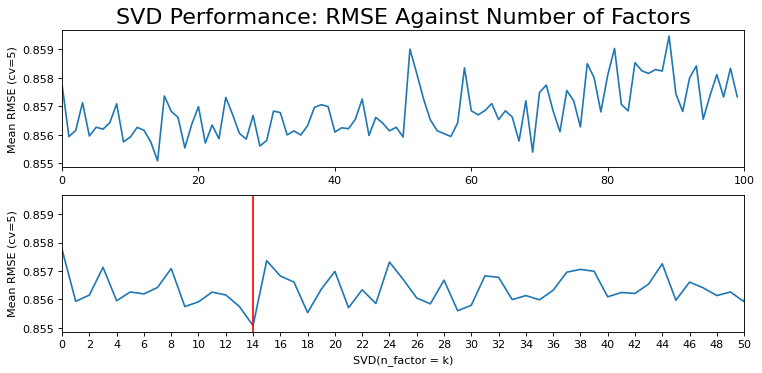

In [222]:
plot_rmse(rmse_svd,"SVD")

GridsearchCV (Sample)

In [223]:
param_grid = {'n_factors': [9,10,12,14,15,17,21,25,26,38]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
best_k = gs.best_params['rmse'];
print(gs.best_params['rmse'])

0.8547926723842071
{'n_factors': 14}


In [224]:
algo_SVD = SVD(n_factors = best_k['n_factors'])
algo_SVD.fit(trainset)


# Predict ratings for all pairs (i,j) that are NOT in the training set.
testset = trainset.build_anti_testset()

predictions = algo_SVD.test(testset)

# subset of the list  predictions
predictions[0:2]

[Prediction(uid=10, iid="Pirates of the Caribbean: At World's End", r_ui=3.5398557981173644, est=3.281888229717508, details={'was_impossible': False}),
 Prediction(uid=10, iid='John Carter', r_ui=3.5398557981173644, est=2.9413829432749936, details={'was_impossible': False})]

In [225]:
predictions

[Prediction(uid=10, iid="Pirates of the Caribbean: At World's End", r_ui=3.5398557981173644, est=3.281888229717508, details={'was_impossible': False}),
 Prediction(uid=10, iid='John Carter', r_ui=3.5398557981173644, est=2.9413829432749936, details={'was_impossible': False}),
 Prediction(uid=10, iid='Spider-Man 3', r_ui=3.5398557981173644, est=2.8541041163478233, details={'was_impossible': False}),
 Prediction(uid=10, iid='Avengers: Age of Ultron', r_ui=3.5398557981173644, est=3.046058938079295, details={'was_impossible': False}),
 Prediction(uid=10, iid='Batman v Superman: Dawn of Justice', r_ui=3.5398557981173644, est=2.3769059872525733, details={'was_impossible': False}),
 Prediction(uid=10, iid='Superman Returns', r_ui=3.5398557981173644, est=3.0274346049123992, details={'was_impossible': False}),
 Prediction(uid=10, iid="Pirates of the Caribbean: Dead Man's Chest", r_ui=3.5398557981173644, est=3.460497231381614, details={'was_impossible': False}),
 Prediction(uid=10, iid='The Lone 

In [251]:
pickle.dump(predictions,open('predictions.pkl','wb'))


In [256]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [258]:
import joblib


In [259]:
joblib.dump(predictions,'predictions_joblib')

['predictions_joblib']

In [225]:
def get_top_n(predictions, userId, movies_df, ratings_df, n = 10):
    '''Return the top N (default) movieId for a user,.i.e. userID and history for comparisom
    Args:
    Returns: 
  
    '''
    #Peart I.: Surprise docomuntation
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    #Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/
    
    #3. Tells how many movies the user has already rated
    user_data = ratings_df[ratings_df.userId == (userId)]
    print('User {0} has already rated {1} movies.'.format(userId, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["userId" ,"movieId","rat_pred"])
    
    
    #5. Return pred_usr, i.e. top N recommended movies with (merged) titles and genres. 
    pred_usr = preds_df[preds_df["userId"] == (userId)].merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId')
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = ratings_df[ratings_df.userId == (userId) ].sort_values("rating", ascending = False).merge\
    (movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId')
    
    
    return hist_usr, pred_usr

testing bag of words


In [226]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [227]:
vector = cv.fit_transform(dataframe['tags']).toarray()

In [228]:
vector[0]

array([0, 0, 0, ..., 0, 0, 0])

In [229]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '1492pictur',
 '15',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1980',
 '1985',
 '1990',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2009',
 '20th',
 '21lapsentertain',
 '24',
 '25',
 '2929product',
 '30',
 '300',
 '3artsentertain',
 '3d',
 '40',
 '40acres',
 '50',
 '500',
 '60',
 '70',
 'a24',
 'aaron',
 'aaroneckhart',
 'aarontaylor',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'adam',
 'adambrodi',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult',
 'adulteri'

In [230]:
from sklearn.metrics.pairwise import cosine_similarity

In [231]:
similarity = cosine_similarity(vector)

In [232]:
similarity

array([[1.        , 0.10529963, 0.1067521 , ..., 0.06726728, 0.0238705 ,
        0.0238705 ],
       [0.10529963, 1.        , 0.08219949, ..., 0.04604093, 0.02450715,
        0.04901431],
       [0.1067521 , 0.08219949, 1.        , ..., 0.046676  , 0.0248452 ,
        0.0248452 ],
       ...,
       [0.06726728, 0.04604093, 0.046676  , ..., 1.        , 0.06262243,
        0.06262243],
       [0.0238705 , 0.02450715, 0.0248452 , ..., 0.06262243, 1.        ,
        0.11111111],
       [0.0238705 , 0.04901431, 0.0248452 , ..., 0.06262243, 0.11111111,
        1.        ]])

In [233]:
def recommend_bow(movie):
    index = dataframe[dataframe['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:9]:
        print(dataframe.iloc[i[0]].title)
        #print(dataframe.iloc[i[0]].	movie_id)

In [234]:
recommend_bow('Harry Potter and the Philosopher\'s Stone')

Harry Potter and the Chamber of Secrets
1982
The Adventures of Elmo in Grouchland
Harry Potter and the Order of the Phoenix
The R.M.
Krrish
Flying By
Harry Potter and the Goblet of Fire


bert (google 2018)¶
lets try text vectorization using bert

In [237]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 4.5 MB/s 
     |████████████████████████████████| 4.2 MB 18.4 MB/s 
     |████████████████████████████████| 1.2 MB 45.2 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 6.6 MB 43.4 MB/s 
     |████████████████████████████████| 596 kB 59.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=afd0614dd947b88e285be9dcb5d97bac72686281c8890ac16dbfb7fd886fa1f2
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [238]:
from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [239]:
#Get Embeddings
sentence_embeddings = bert.encode(dataframe['tags'].tolist())

In [240]:
sentence_embeddings[0]

array([-4.91697431e-01,  6.89591944e-01,  3.93349901e-02,  1.38256773e-01,
        2.60770828e-01, -2.96357244e-01, -9.73714143e-02,  3.06579135e-02,
       -3.51981223e-01, -3.54719490e-01, -6.89107299e-01,  3.24435472e-01,
        8.37677866e-02,  1.25901520e+00, -3.87318373e-01,  7.05903351e-01,
       -5.63158631e-01, -1.10753573e-01, -2.72041053e-01,  5.48839793e-02,
       -6.69977784e-01,  3.03379238e-01, -2.21723154e-01,  1.22983523e-01,
        3.19109142e-01,  3.36315513e-01, -1.68864414e-01,  3.73172522e-01,
       -5.32829702e-01,  5.29234886e-01, -6.38261855e-01, -7.81005472e-02,
       -4.28529680e-01, -1.40192956e-01, -1.83872864e-01,  2.59372950e-01,
       -2.25954771e-01,  2.66759694e-01,  2.82817334e-01,  2.63409495e-01,
       -2.34934315e-01, -6.55764639e-01,  2.35988162e-02, -5.92734993e-01,
       -1.52146387e+00, -1.38971210e-01,  5.82128406e-01,  4.46476787e-01,
        3.09455037e-01, -4.54341561e-01,  9.74503577e-01,  3.09434116e-01,
        2.02572569e-01, -

In [241]:
#Compute similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_bert = cosine_similarity(sentence_embeddings)

In [242]:
similarity_bert

array([[1.0000001 , 0.7350346 , 0.5243318 , ..., 0.48932603, 0.42444232,
        0.5738554 ],
       [0.7350346 , 0.9999999 , 0.6462196 , ..., 0.67438984, 0.6294035 ,
        0.6196741 ],
       [0.5243318 , 0.6462196 , 1.        , ..., 0.7582774 , 0.68119943,
        0.5672051 ],
       ...,
       [0.48932603, 0.67438984, 0.7582774 , ..., 1.        , 0.7448808 ,
        0.5912813 ],
       [0.42444232, 0.6294035 , 0.68119943, ..., 0.7448808 , 1.0000002 ,
        0.60193205],
       [0.5738554 , 0.6196741 , 0.5672051 , ..., 0.5912813 , 0.60193205,
        0.99999964]], dtype=float32)

In [243]:
def recommend(movie):
    index = dataframe[dataframe['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity_bert[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:9]:
        print(dataframe.iloc[i[0]].title)
        print(dataframe.iloc[i[0]].	movie_id)

In [244]:
recommend('Batman Begins')

The Dark Knight
155
The Dark Knight Rises
49026
Batman v Superman: Dawn of Justice
209112
Batman
268
Batman
2661
Batman Forever
414
Batman: The Dark Knight Returns, Part 2
142061
Teenage Mutant Ninja Turtles
98566


In [245]:
recommend('Harry Potter and the Philosopher\'s Stone')

Harry Potter and the Goblet of Fire
674
Harry Potter and the Half-Blood Prince
767
A Simple Wish
17834
Stitches
115210
Elf
10719
Just Visiting
56715
The Muppets
64328
The NeverEnding Story
34584


In [246]:
import pickle

In [247]:

pickle.dump(similarity_bert,open('similarityBert.pkl','wb'))
pickle.dump(sentence_embeddings,open('text_vectors.pkl','wb'))